In [1]:
import sys
from typing import Optional

import pandas as pd
from datasets import DatasetDict, Dataset, load_from_disk

sys.path.append('..')

from src.data_processing.translations_fingpt import (ner_cls_translations,
                                                     ner_translations,
                                                     finred_re_translations,
                                                     finred_general,
                                                     finred_translations,
                                                     finred_cls_translations,
                                                     headline_translations, 
                                                     sentiment_translations)

/home/sandernoels/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def translate_sentence(sentence: str, translations: dict) -> str:
    for eng, dutch in translations.items():
        if eng in sentence:
            sentence = sentence.replace(eng, dutch)
    return sentence

def replace_dataset_col_with_transaltion(dataset,translations):
    for dataset_keys in dataset.keys():
        pd_df = dataset[dataset_keys].to_pandas()

        text_translations = list(pd_df['instruction'].apply(lambda x : translate_sentence(x,translations)))
       
        new_dataset = dataset[dataset_keys].remove_columns("instruction")
        dataset_with_new_translation = new_dataset.add_column(
            "instruction", text_translations
        )
        dataset[dataset_keys] = dataset_with_new_translation
    return dataset

def save_new_dataset(target_location: str, train: pd.DataFrame, test: Optional[pd.DataFrame] = None):
    ds = DatasetDict({
        'train': Dataset.from_pandas(train, preserve_index=False)
    })

    if test is not None:
        ds['test'] = Dataset.from_pandas(test, preserve_index=False)

    ds.save_to_disk(target_location)



# NER-CLS

In [31]:
dataset = load_from_disk('../data/FinGPT/fingpt-ner-cls')

In [32]:
dataset = replace_dataset_col_with_transaltion(dataset, ner_cls_translations)

In [33]:
dataset.save_to_disk('../data/preprocessed/fingpt-ner-cls')

Saving the dataset (1/1 shards): 100%|██████████| 3502/3502 [00:00<00:00, 589424.26 examples/s]


# NER

In [34]:
dataset = load_from_disk('../data/FinGPT/fingpt-ner')

In [35]:
dataset = replace_dataset_col_with_transaltion(dataset, ner_translations)

In [36]:
dataset.save_to_disk('../data/preprocessed/fingpt-ner-cls')

Saving the dataset (1/1 shards): 100%|██████████| 98/98 [00:00<00:00, 36034.17 examples/s]


# FINRED-RE

In [37]:
dataset = load_from_disk('../data/FinGPT/fingpt-finred-re')

In [38]:
dataset = replace_dataset_col_with_transaltion(dataset, finred_re_translations)

In [39]:
dataset.save_to_disk('../data/preprocessed/fingpt-ner-cls')

Saving the dataset (1/1 shards): 100%|██████████| 2136/2136 [00:00<00:00, 457000.27 examples/s]


# FINRED

In [40]:
dataset = load_from_disk('../data/FinGPT/fingpt-finred')

In [41]:
dataset = replace_dataset_col_with_transaltion(dataset, finred_translations)
dataset = replace_dataset_col_with_transaltion(dataset, finred_general)

In [42]:
dataset.save_to_disk('../data/preprocessed/fingpt-ner-cls')

Saving the dataset (1/1 shards): 100%|██████████| 5112/5112 [00:00<00:00, 451994.90 examples/s]


# FINRED-CLS

In [43]:
dataset = load_from_disk('../data/FinGPT/fingpt-finred-cls')

In [44]:
dataset = replace_dataset_col_with_transaltion(dataset, finred_cls_translations)
dataset = replace_dataset_col_with_transaltion(dataset, finred_general)

In [45]:
dataset.save_to_disk('../data/preprocessed/fingpt-ner-cls')

Saving the dataset (1/1 shards): 100%|██████████| 8928/8928 [00:00<00:00, 1061626.35 examples/s]


# HEADLINE

In [19]:
dataset = load_from_disk('../data/FinGPT/fingpt-headline')

In [20]:
dataset = replace_dataset_col_with_transaltion(dataset, headline_translations)

In [21]:
dataset.save_to_disk('../data/preprocessed/fingpt-headline')

Saving the dataset (1/1 shards): 100%|██████████| 20547/20547 [00:00<00:00, 2233461.99 examples/s]


# FINANCE-ALPACA

In [51]:
dataset_1 = load_from_disk('../data/FinGPT/finance-alpaca')

In [52]:
df = dataset_1['train'].to_pandas()

df_without_input = df[df['input'].apply(lambda x : len(x) == 0)]
df_with_input  = df[df['input'].apply(lambda x : len(x) != 0)]

In [53]:
save_new_dataset('../data/preprocessed/finance-alpaca-without-input', df_without_input)
save_new_dataset('../data/preprocessed/finance-alpaca-with-input', df_with_input)

Saving the dataset (1/1 shards): 100%|██████████| 19728/19728 [00:00<00:00, 1626889.55 examples/s]


# SENTIMENT

In [8]:
# train
ds_train = load_from_disk('../data/FinGPT/fingpt-sentiment-train')

# test
ds_test = load_from_disk('../data/FinGPT/fingpt-sentiment-test')

# combine them
replaced_train_ds = replace_dataset_col_with_transaltion(ds_train, sentiment_translations)
replaced_test_ds = replace_dataset_col_with_transaltion(ds_test, sentiment_translations)

sentiment = DatasetDict()
sentiment['train'] = replaced_train_ds['train']
sentiment['test'] = replaced_test_ds['test']

In [10]:
sentiment.save_to_disk('../data/preprocessed/fingpt-sentiment')

Saving the dataset (1/1 shards): 100%|██████████| 7922/7922 [00:00<00:00, 1322373.39 examples/s]


## ECTSum

In [20]:
from datasets import load_dataset

ds = load_dataset('mrSoul7766/ECTSum')

ds

DatasetDict({
    train: Dataset({
        features: ['summary', 'text'],
        num_rows: 1681
    })
    test: Dataset({
        features: ['summary', 'text'],
        num_rows: 495
    })
})

In [6]:
pd_df = ds['train'].to_pandas()

<Axes: ylabel='Frequency'>

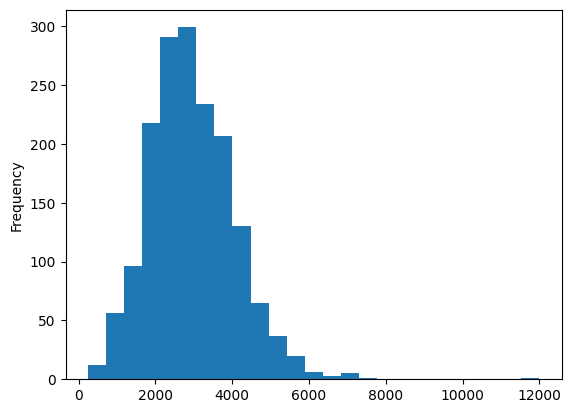

In [26]:
import re
import matplotlib.pyplot as plt

pd_df.text.apply(lambda x : len(re.findall(r'\w+', x))).plot.hist(bins=25)


In [ ]:
### NOT ADDED YET

## Stock Movement Prediction
- [ACL18](https://huggingface.co/datasets/TheFinAI/flare-sm-acl)
- [CIKM18](https://huggingface.co/datasets/TheFinAI/flare-sm-cikm)
- [BIGDATA22](https://huggingface.co/datasets/TheFinAI/flare-sm-bigdata)